$$ ITI \space AI-Pro: \space Intake \space 45 $$
$$ Deep \space Learning $$
$$ Lab \space no. \space 1 $$

# `01` Assignment 01
- Design your own simple ANN,(one perceptron with one input layer
and one output neuron)
- Use the data points listed in the adjacent Table as your training data.
- Assume the activation function is sigmoid.
- Assume there is no bias for simplicity (b=0).
- Test your design using different iteration numbers.


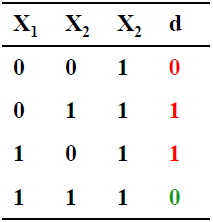

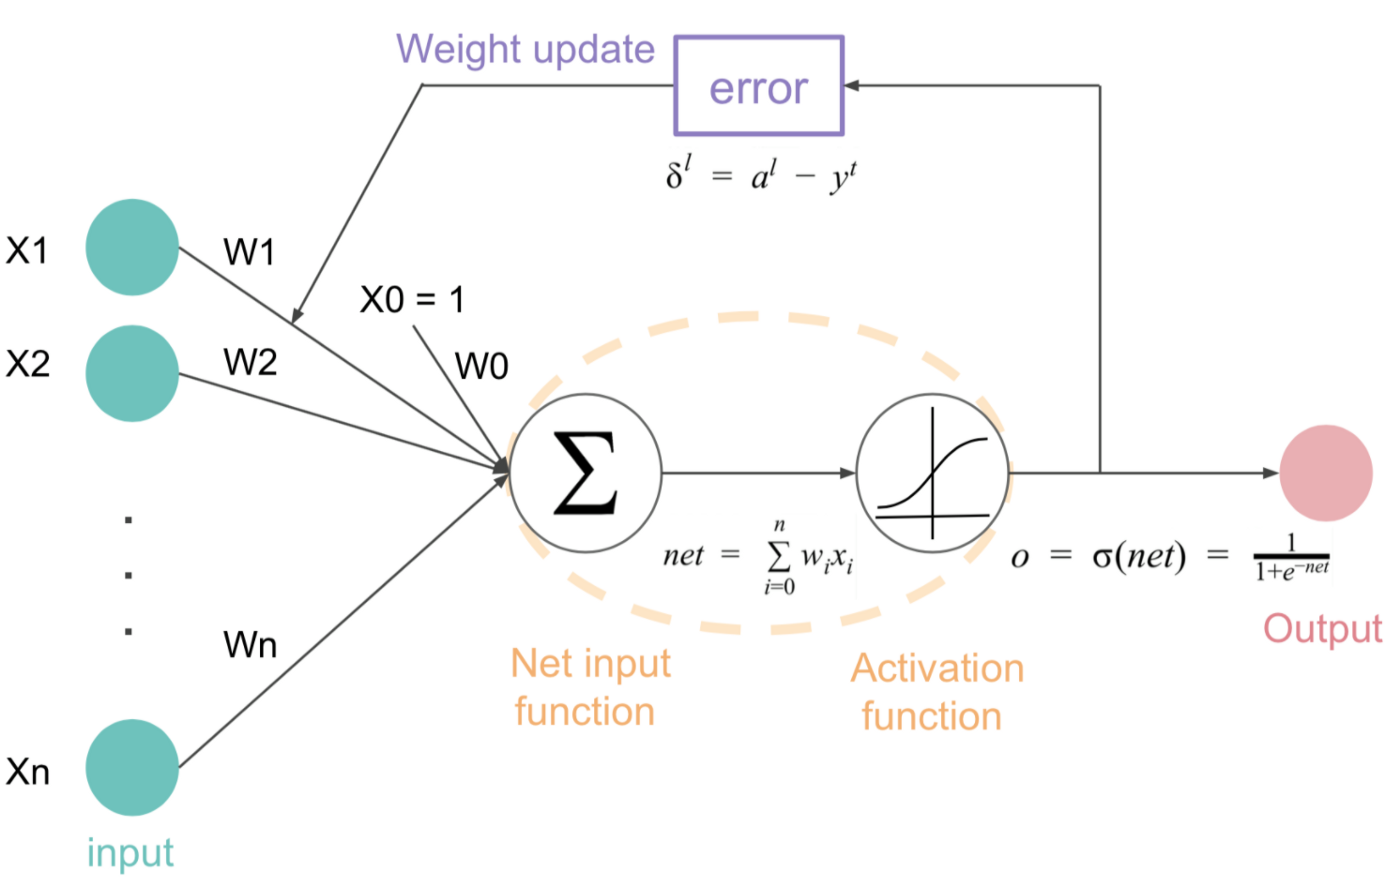

## `i` Implementation

In [1]:
import numpy as np

np.random.seed = 42

In [2]:
class ANN:
    def __init__(self, X, y):
        self.X=X
        self.y=y
        self.weigth=np.random.rand(self.X.shape[1],1)
        self.y_pred=np.zeros(y.shape)
        self.loss=[]
        self.lr=0.01


    def sigmoid(self, z):
        f_x=1/(1+np.exp(-z))
        return f_x


    def sigmoid_derivative(self, p):
        return p*(1-p)



    def feedforward(self):
        self.summation=np.dot(self.X,self.weigth)
        self.y_pred=self.sigmoid(self.summation)
        return self.y_pred




    def backprop(self):
        error=self.y-self.y_pred
        f_der=self.sigmoid_derivative(self.y_pred)
        gradient=error * f_der
        self.weigth += self.lr * np.dot(self.X.T, gradient)
        return self.weigth



    def fit(self, iterations, verbose=1):
        self.iterations=iterations
        for i in range(iterations):
            self.feedforward()
            self.backprop()
            loss=np.mean((self.y-self.y_pred)**2)
            self.loss.append(loss)
            if verbose == 1 and i % 100 == 0:
                print(f"iteration: {i}\n, loss: {loss}\n,y_actual:\n{self.y}\n,y_prediction:\n{self.y_pred}\n")
        print(f"Final loss after {iterations} iterations: {self.loss[-1]:.6f}")





## `ii` Testing

In [3]:
X = np.array([
    [0, 0, 1],
    [1, 1, 1],
    [1, 0, 1],
    [0, 1, 1],
], dtype=float)


y = np.array([
    [0],
    [1],
    [1],
    [0],
], dtype=float)


print('X:\n', X, '\n')
print('y:\n', y)

X:
 [[0. 0. 1.]
 [1. 1. 1.]
 [1. 0. 1.]
 [0. 1. 1.]] 

y:
 [[0.]
 [1.]
 [1.]
 [0.]]


In [4]:
model = ANN(X, y)
model.fit(iterations=1000, verbose=1)

iteration: 0
, loss: 0.28137682036046907
,y_actual:
[[0.]
 [1.]
 [1.]
 [0.]]
,y_prediction:
[[0.6290503 ]
 [0.74293023]
 [0.64221774]
 [0.73192212]]

iteration: 100
, loss: 0.25567770643876553
,y_actual:
[[0.]
 [1.]
 [1.]
 [0.]]
,y_prediction:
[[0.59207658]
 [0.72068347]
 [0.6376456 ]
 [0.68032178]]

iteration: 200
, loss: 0.23100889843765976
,y_actual:
[[0.]
 [1.]
 [1.]
 [0.]]
,y_prediction:
[[0.5566798 ]
 [0.70220416]
 [0.63727357]
 [0.62760686]]

iteration: 300
, loss: 0.20840200075942383
,y_actual:
[[0.]
 [1.]
 [1.]
 [0.]]
,y_prediction:
[[0.52430803]
 [0.68906974]
 [0.64130742]
 [0.57738298]]

iteration: 400
, loss: 0.18827389822299384
,y_actual:
[[0.]
 [1.]
 [1.]
 [0.]]
,y_prediction:
[[0.4955985 ]
 [0.68163527]
 [0.64917887]
 [0.53202082]]

iteration: 500
, loss: 0.17059033365568402
,y_actual:
[[0.]
 [1.]
 [1.]
 [0.]]
,y_prediction:
[[0.47048707]
 [0.67924289]
 [0.6598571 ]
 [0.4923626 ]]

iteration: 600
, loss: 0.15511473013000074
,y_actual:
[[0.]
 [1.]
 [1.]
 [0.]]
,y_predicti

----

# `02` Assignment 02
- Modify the above designed code to implement a `multi layer perceptron`, `MLP` (an ANN with one input layer, one hidden layer and one output layer) for the same data points above
- Assume `sigmoid` activation function and there is `no bias` for simplicity (b=0)
- Test your approach using `different iteration numbers` and `different number of nodes` for the hidden layer (e.g. 4, 8 and 16)

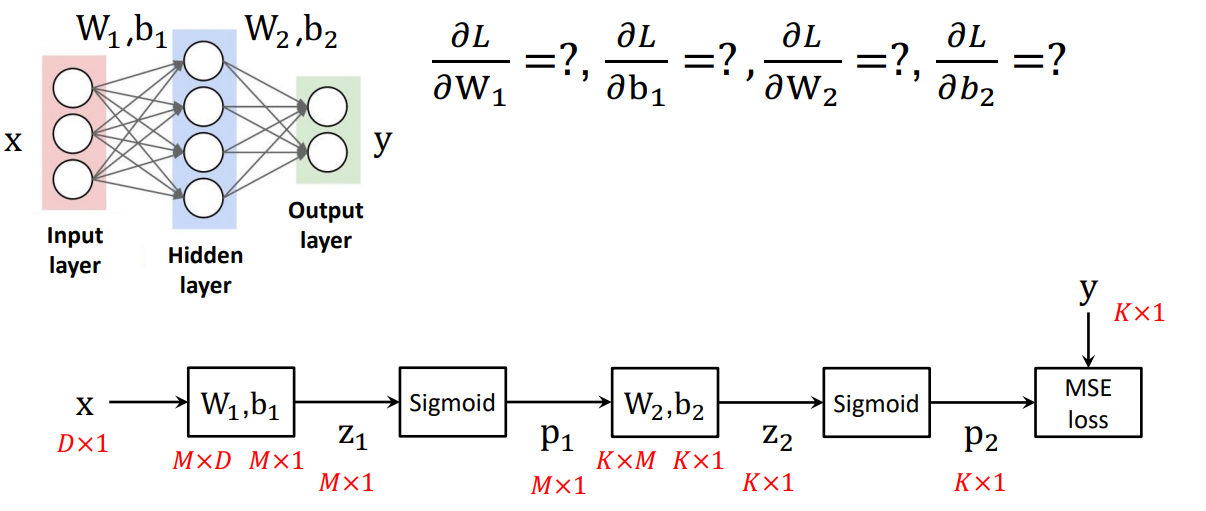

## `i` Implementation

In [5]:
class ANN:
    def __init__(self, X, y,num_hidden_nodes):
        self.X=X
        self.y=y
        self.num_hidden_nodes=num_hidden_nodes
        self.weigth=np.random.rand(self.X.shape[1],self.num_hidden_nodes)
        self.weigth_hidden=np.random.rand(self.num_hidden_nodes,1)
        self.y_pred=np.zeros(y.shape)
        self.loss=[]
        self.lr=0.1

    def sigmoid(self, z):
        f_x=1/(1+np.exp(-z))
        return f_x

    def sigmoid_derivative(self, p):
        return p*(1-p)

    def feedforward(self):
        self.summation=np.dot(self.X,self.weigth)
        self.y_pred_1=self.sigmoid(self.summation)
        self.y_pred_hidden=np.dot(self.y_pred_1,self.weigth_hidden)
        self.y_pred_final=self.sigmoid(self.y_pred_hidden)
        return self.y_pred_final


    def backprop(self):
        error_1=self.y-self.y_pred_final
        gradient=error_1*self.sigmoid_derivative(self.y_pred_final)
        self.weigth_hidden+=self.lr*np.dot(self.y_pred_1.T,gradient)
        eta=np.dot(gradient,self.weigth_hidden.T)* self.sigmoid_derivative(self.y_pred_1)
        self.weigth+=self.lr*np.dot(self.X.T,eta)
        return self.weigth,self.weigth_hidden

    def fit(self, iterations, verbose=1):
        self.iterations=iterations
        for i in range(iterations):
            self.feedforward()
            self.backprop()
            loss=np.mean((self.y-self.y_pred_final)**2)
            self.loss.append(loss)
            if verbose == 1 and i % 100 == 0:
                print(f"iteration: {i}\n, loss: {loss}\n,y_actual:\n{self.y}\n,y_prediction:\n{self.y_pred_final}\n")
        print(f"Final loss after {iterations} iterations: {self.loss[-1]:.6f}")


## `ii` Testing

In [6]:
X = np.array([
    [0, 0, 1],
    [1, 1, 1],
    [1, 0, 1],
    [0, 1, 1],
], dtype=float)


y = np.array([
    [0],
    [1],
    [1],
    [0],
], dtype=float)


print('X:\n', X, '\n')
print('y:\n', y)

X:
 [[0. 0. 1.]
 [1. 1. 1.]
 [1. 0. 1.]
 [0. 1. 1.]] 

y:
 [[0.]
 [1.]
 [1.]
 [0.]]


In [7]:
model = ANN(X, y, 8)
model.fit(iterations=1000, verbose=1)

iteration: 0
, loss: 0.44316083186447264
,y_actual:
[[0.]
 [1.]
 [1.]
 [0.]]
,y_prediction:
[[0.93033184]
 [0.96746869]
 [0.95671395]
 [0.95089118]]

iteration: 100
, loss: 0.23757391586511512
,y_actual:
[[0.]
 [1.]
 [1.]
 [0.]]
,y_prediction:
[[0.52300605]
 [0.55390959]
 [0.55106962]
 [0.5255713 ]]

iteration: 200
, loss: 0.21689595984816773
,y_actual:
[[0.]
 [1.]
 [1.]
 [0.]]
,y_prediction:
[[0.50191952]
 [0.56883118]
 [0.57389323]
 [0.49818381]]

iteration: 300
, loss: 0.1772576948944749
,y_actual:
[[0.]
 [1.]
 [1.]
 [0.]]
,y_prediction:
[[0.45939449]
 [0.59989671]
 [0.62116875]
 [0.44089877]]

iteration: 400
, loss: 0.11927018204238236
,y_actual:
[[0.]
 [1.]
 [1.]
 [0.]]
,y_prediction:
[[0.38675608]
 [0.65754333]
 [0.70081961]
 [0.34744062]]

iteration: 500
, loss: 0.06813680893126181
,y_actual:
[[0.]
 [1.]
 [1.]
 [0.]]
,y_prediction:
[[0.30068168]
 [0.73103627]
 [0.78486013]
 [0.25201411]]

iteration: 600
, loss: 0.03849361968499463
,y_actual:
[[0.]
 [1.]
 [1.]
 [0.]]
,y_predictio

In [8]:
model = ANN(X, y, 4)
model.fit(iterations=1000, verbose=1)

iteration: 0
, loss: 0.31406240174921063
,y_actual:
[[0.]
 [1.]
 [1.]
 [0.]]
,y_prediction:
[[0.74329087]
 [0.78926888]
 [0.76185498]
 [0.77630383]]

iteration: 100
, loss: 0.24707063138306065
,y_actual:
[[0.]
 [1.]
 [1.]
 [0.]]
,y_prediction:
[[0.51776711]
 [0.52756267]
 [0.52577921]
 [0.52164869]]

iteration: 200
, loss: 0.24308240782864235
,y_actual:
[[0.]
 [1.]
 [1.]
 [0.]]
,y_prediction:
[[0.51094285]
 [0.52637182]
 [0.5276974 ]
 [0.51368632]]

iteration: 300
, loss: 0.23372827598281337
,y_actual:
[[0.]
 [1.]
 [1.]
 [0.]]
,y_prediction:
[[0.50089712]
 [0.53170687]
 [0.53856007]
 [0.50178672]]

iteration: 400
, loss: 0.2113999867118591
,y_actual:
[[0.]
 [1.]
 [1.]
 [0.]]
,y_prediction:
[[0.47702214]
 [0.54595385]
 [0.56445826]
 [0.47137598]]

iteration: 500
, loss: 0.16537175516130714
,y_actual:
[[0.]
 [1.]
 [1.]
 [0.]]
,y_prediction:
[[0.42724291]
 [0.5834521 ]
 [0.62234249]
 [0.40350114]]

iteration: 600
, loss: 0.10485995481428335
,y_actual:
[[0.]
 [1.]
 [1.]
 [0.]]
,y_predictio

In [9]:
model = ANN(X, y, 16)
model.fit(iterations=1000, verbose=1)

iteration: 0
, loss: 0.4982972533293353
,y_actual:
[[0.]
 [1.]
 [1.]
 [0.]]
,y_prediction:
[[0.99759487]
 [0.99960937]
 [0.99923781]
 [0.99899588]]

iteration: 100
, loss: 0.4977511460400095
,y_actual:
[[0.]
 [1.]
 [1.]
 [0.]]
,y_prediction:
[[0.99686142]
 [0.99944922]
 [0.99895696]
 [0.99863432]]

iteration: 200
, loss: 0.49670129535180146
,y_actual:
[[0.]
 [1.]
 [1.]
 [0.]]
,y_prediction:
[[0.99547426]
 [0.99911517]
 [0.99839259]
 [0.99791423]]

iteration: 300
, loss: 0.4938830551626041
,y_actual:
[[0.]
 [1.]
 [1.]
 [0.]]
,y_prediction:
[[0.99184563]
 [0.99809524]
 [0.99676775]
 [0.99587167]]

iteration: 400
, loss: 0.46654385028375667
,y_actual:
[[0.]
 [1.]
 [1.]
 [0.]]
,y_prediction:
[[0.95882514]
 [0.98376235]
 [0.9773948 ]
 [0.97265363]]

iteration: 500
, loss: 0.230708535926826
,y_actual:
[[0.]
 [1.]
 [1.]
 [0.]]
,y_prediction:
[[0.52506192]
 [0.55144824]
 [0.56389217]
 [0.50572265]]

iteration: 600
, loss: 0.19976637676762765
,y_actual:
[[0.]
 [1.]
 [1.]
 [0.]]
,y_prediction:
[

In [10]:
model = ANN(X, y, 8)
model.fit(iterations=1000, verbose=1)

iteration: 0
, loss: 0.45082553156425914
,y_actual:
[[0.]
 [1.]
 [1.]
 [0.]]
,y_prediction:
[[0.94052436]
 [0.96976624]
 [0.96044963]
 [0.95720308]]

iteration: 100
, loss: 0.2370998871954347
,y_actual:
[[0.]
 [1.]
 [1.]
 [0.]]
,y_prediction:
[[0.52420842]
 [0.53851746]
 [0.55239495]
 [0.51018493]]

iteration: 200
, loss: 0.21472267864081346
,y_actual:
[[0.]
 [1.]
 [1.]
 [0.]]
,y_prediction:
[[0.50171352]
 [0.55458447]
 [0.57841656]
 [0.48067314]]

iteration: 300
, loss: 0.17334140576588042
,y_actual:
[[0.]
 [1.]
 [1.]
 [0.]]
,y_prediction:
[[0.45835785]
 [0.58709562]
 [0.63163487]
 [0.42082158]]

iteration: 400
, loss: 0.11525062290802887
,y_actual:
[[0.]
 [1.]
 [1.]
 [0.]]
,y_prediction:
[[0.38462534]
 [0.64807965]
 [0.7150625 ]
 [0.32867694]]

iteration: 500
, loss: 0.06555641263409615
,y_actual:
[[0.]
 [1.]
 [1.]
 [0.]]
,y_prediction:
[[0.29769107]
 [0.72613594]
 [0.7959371 ]
 [0.23866815]]

iteration: 600
, loss: 0.03743918073243725
,y_actual:
[[0.]
 [1.]
 [1.]
 [0.]]
,y_predictio

---

# `03` Assignment 03
- Use the `Keras` library tensorflow keras to build different ANNs using different numbers of hidden layers:
  - `shallow`  : 1 hidden, output layer
  - `deeper`   : two hidden layers with 12 and 8 nodes respectively
  - `more deep`: three hidden layers with 32 16 8 nodes respectively

Use the diabetic dataset provided [here](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database) to train and test your design Use the `ReLU` activation for the hidden layers and the `sigmoid` activation for the output neuron,
- `loss='binary_crossentropy'`
- `optimizer='adam'`
- `metrics=['accuracy’]`
- `epochs=150`

## `0` Import Libraries & Load Dataset

In [11]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

np.random.seed = 42

In [12]:
dataset =pd.read_csv("/content/diabetes.csv")
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [13]:
X =dataset.drop("Outcome",axis=1)
y =dataset.Outcome

In [14]:
X.shape

(768, 8)

In [15]:
y.shape

(768,)

In [16]:
x_train,x_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2,random_state= 42)

## `i` Shallow network


In [17]:
model=Sequential()

model.add(Dense(5,activation="relu",input_shape=(X.shape[1],)))
model.add(Dense(1,activation="sigmoid"))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 5)                   │              45 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51 (204.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
X.shape

(768, 8)

In [19]:
768/32

24.0

In [20]:
model.compile(optimizer=keras.optimizers.Adam(0.01), loss="binary_crossentropy", metrics=["accuracy"])

In [21]:
history = model.fit(x_train, y_train, epochs=150, batch_size=32)

Epoch 1/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4180 - loss: 49.7223
Epoch 2/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6450 - loss: 12.8106
Epoch 3/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6358 - loss: 6.0148
Epoch 4/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6622 - loss: 3.7094
Epoch 5/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6705 - loss: 2.6324
Epoch 6/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6693 - loss: 1.7415
Epoch 7/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6613 - loss: 1.2804
Epoch 8/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6182 - loss: 1.1298
Epoch 9/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6286 - loss: 0.8605  
Epoch 10/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6390 - loss: 0.7981
Epoch 11/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6162 - loss: 0.7877
Epoch 12/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accur

In [22]:
history.history

{'accuracy': [0.47231268882751465,
  0.6400651335716248,
  0.6351791620254517,
  0.653094470500946,
  0.6693810820579529,
  0.6563518047332764,
  0.6514657735824585,
  0.6368077993392944,
  0.6205211877822876,
  0.6449511647224426,
  0.6482084393501282,
  0.6416938304901123,
  0.6775244474411011,
  0.6221498250961304,
  0.6351791620254517,
  0.6156351566314697,
  0.653094470500946,
  0.6449511647224426,
  0.6254071593284607,
  0.6221498250961304,
  0.6335504651069641,
  0.5635179281234741,
  0.594462513923645,
  0.6889250874519348,
  0.6498371362686157,
  0.6710097789764404,
  0.6400651335716248,
  0.6791530847549438,
  0.6758957505226135,
  0.6254071593284607,
  0.6319218277931213,
  0.6302931308746338,
  0.604234516620636,
  0.6563518047332764,
  0.662866473197937,
  0.6775244474411011,
  0.638436496257782,
  0.6824104189872742,
  0.6596091389656067,
  0.6710097789764404,
  0.6775244474411011,
  0.7166123986244202,
  0.6758957505226135,
  0.6954397559165955,
  0.6742671132087708,
  0

In [23]:
history.history.keys()

dict_keys(['accuracy', 'loss'])

In [24]:
history.history.items()

dict_items([('accuracy', [0.47231268882751465, 0.6400651335716248, 0.6351791620254517, 0.653094470500946, 0.6693810820579529, 0.6563518047332764, 0.6514657735824585, 0.6368077993392944, 0.6205211877822876, 0.6449511647224426, 0.6482084393501282, 0.6416938304901123, 0.6775244474411011, 0.6221498250961304, 0.6351791620254517, 0.6156351566314697, 0.653094470500946, 0.6449511647224426, 0.6254071593284607, 0.6221498250961304, 0.6335504651069641, 0.5635179281234741, 0.594462513923645, 0.6889250874519348, 0.6498371362686157, 0.6710097789764404, 0.6400651335716248, 0.6791530847549438, 0.6758957505226135, 0.6254071593284607, 0.6319218277931213, 0.6302931308746338, 0.604234516620636, 0.6563518047332764, 0.662866473197937, 0.6775244474411011, 0.638436496257782, 0.6824104189872742, 0.6596091389656067, 0.6710097789764404, 0.6775244474411011, 0.7166123986244202, 0.6758957505226135, 0.6954397559165955, 0.6742671132087708, 0.6905537247657776, 0.6726384162902832, 0.7214983701705933, 0.7068403959274292,

In [25]:
history.history.update()

In [26]:
model.get_weights()

[array([[-0.96472234, -0.07610076,  0.49479905, -0.05211791, -0.35655358],
        [ 0.2753323 ,  0.5548537 , -0.0446788 ,  0.42647356,  0.24453434],
        [ 0.2115699 , -0.50885266,  0.04874774, -0.25547776,  0.01885034],
        [-0.81759256, -0.68067616, -0.17294382, -0.34707353, -0.5814733 ],
        [ 0.01323762,  0.2550849 , -0.01707844, -0.06768477,  0.16660227],
        [-0.19749875,  0.15055561, -0.37675577,  0.20277826,  0.00308518],
        [-0.52929395, -0.6044713 ,  0.06216721,  0.4990138 ,  0.4569291 ],
        [-0.02512267,  0.06610609, -0.59572387,  0.18108958, -0.02195709]],
       dtype=float32),
 array([ 2.747198  ,  3.2057967 , -0.11179672, -2.904051  , -3.053399  ],
       dtype=float32),
 array([[-0.16689159],
        [-0.10199789],
        [ 0.29323927],
        [ 0.16353963],
        [ 0.24787734]], dtype=float32),
 array([-3.1656272], dtype=float32)]

In [27]:
model.get_metrics_result()

{'accuracy': 0.7654722929000854, 'loss': 0.49652040004730225}

In [28]:
model.evaluate(x_train,y_train)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7338 - loss: 0.5475  


[0.5258526802062988, 0.7475569844245911]

In [29]:
model.evaluate(x_valid,y_valid)[1]

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7276 - loss: 0.5289 


0.7597402334213257

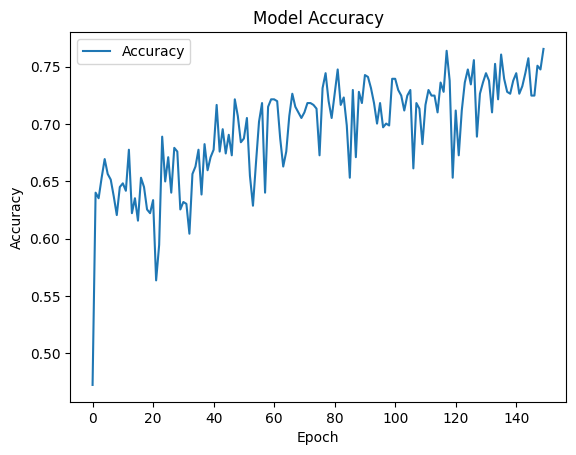

In [30]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

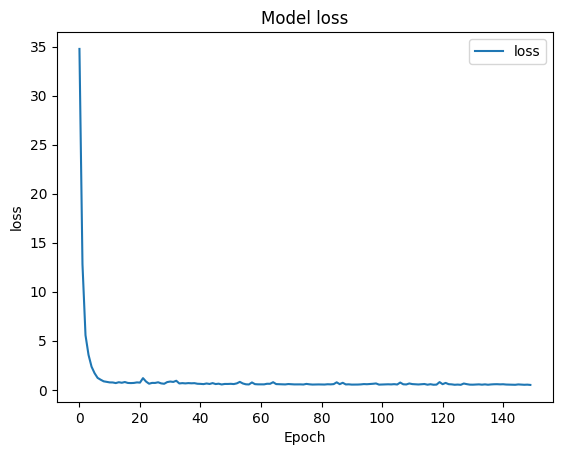

In [31]:
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.title('Model loss')
plt.show()

## `ii` Deep network


In [32]:
model = Sequential()

model.add(Dense(12, activation="relu", input_shape=(X.shape[1],)))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 12)                  │             108 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(optimizer=keras.optimizers.Adam(0.01), loss="binary_crossentropy", metrics=["accuracy"])

In [34]:
model.fit(x_train, y_train, batch_size=32, epochs=150)

Epoch 1/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6135 - loss: 3.5067
Epoch 2/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6623 - loss: 0.7645 
Epoch 3/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6253 - loss: 0.6557 
Epoch 4/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6192 - loss: 0.6620 
Epoch 5/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6764 - loss: 0.6265 
Epoch 6/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6853 - loss: 0.6089 
Epoch 7/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6245 - loss: 0.6241 
Epoch 8/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7120 - loss: 0.5763 
Epoch 9/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6661 - loss: 0.6067 
Epoch 10/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6933 - loss: 0.5881 
Epoch 11/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6858 - loss: 0.5962 
Epoch 12/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

In [35]:
history.history.keys()

dict_keys(['accuracy', 'loss'])

In [36]:
model.evaluate(x_train,y_train)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8214 - loss: 0.4196  


[0.42649176716804504, 0.8127036094665527]

In [37]:
model.evaluate(x_valid,y_valid)[-1]

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7429 - loss: 0.6084 


0.7272727489471436

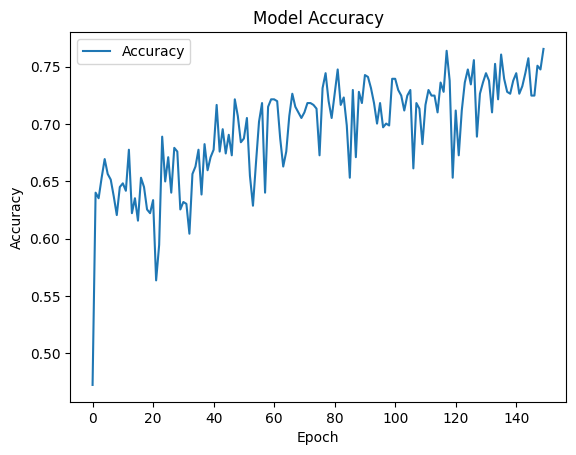

In [38]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

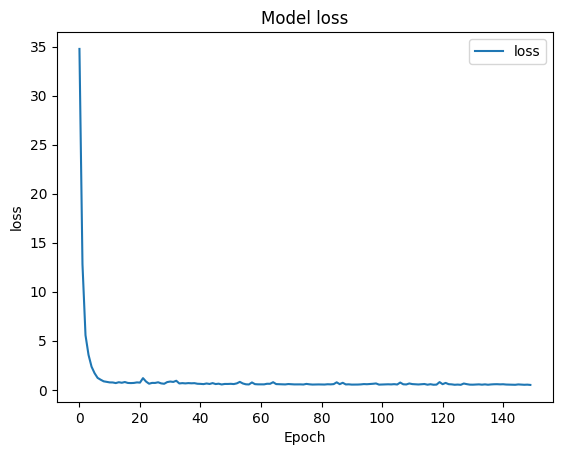

In [39]:
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.title('Model loss')
plt.show()

## `iii` Deeper network


In [40]:
model = Sequential()

model.add(Dense(32, activation="relu", input_shape=(X.shape[1],)))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 961 (3.75 KB)

 Trainable params: 961 (3.75 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(optimizer=keras.optimizers.Adam(0.01),loss="binary_crossentropy",metrics=["accuracy"])

In [42]:
model.fit(x_train,y_train,batch_size=32,epochs=150)

Epoch 1/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5094 - loss: 1.6622
Epoch 2/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6447 - loss: 0.6738 
Epoch 3/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6741 - loss: 0.6413 
Epoch 4/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6427 - loss: 0.6536 
Epoch 5/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6628 - loss: 0.6322 
Epoch 6/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6720 - loss: 0.6245 
Epoch 7/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6115 - loss: 0.6468 
Epoch 8/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6914 - loss: 0.6083 
Epoch 9/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6429 - loss: 0.6212 
Epoch 10/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6979 - loss: 0.5944 
Epoch 11/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6886 - loss: 0.5919 
Epoch 12/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

In [48]:
model.weights

[<Variable path=sequential_2/dense_5/kernel, shape=(8, 32), dtype=float32, value=[[-7.17351854e-01 -1.52778566e-01 -5.06932437e-02  5.12781918e-01
   -2.79001564e-01 -1.28541052e-01  1.56502056e+00 -1.03058624e+00
   -6.15719140e-01 -3.36630523e-01 -7.03856170e-01  1.89537048e-01
   -6.10737860e-01 -3.83744836e-01  6.48502707e-01  2.82294869e-01
    1.40983433e-01 -7.19938219e-01 -2.25052983e-01  2.19740808e-01
    2.98376918e+00 -5.45959651e-01 -1.59881771e+00 -4.25972044e-01
   -1.18299651e+00  1.93034515e-01 -5.20772673e-02  2.19194233e-01
    1.44474164e-01  3.63153160e-01 -2.15612039e-01  3.06311941e+00]
  [ 6.75048456e-02 -4.73765910e-01 -3.30483645e-01  8.02949592e-02
    2.40763441e-01  1.75676569e-01  7.52542540e-02  1.82869017e-01
   -3.32420319e-01  6.29809350e-02  1.02122985e-01 -1.14877075e-01
   -1.74505219e-01 -1.23548051e-02 -5.43731749e-01  1.43263906e-01
    3.01762283e-01  7.30772689e-02 -1.20154090e-01 -3.09359223e-01
   -1.62661636e+00 -4.08562958e-01  1.29513294e-

In [43]:
history.history.keys()

dict_keys(['accuracy', 'loss'])

In [44]:
model.evaluate(x_train,y_train)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7256 - loss: 0.5589


[0.5682381987571716, 0.708469033241272]

In [45]:
model.evaluate(x_valid,y_valid)[-1]

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7069 - loss: 0.5733


0.701298713684082

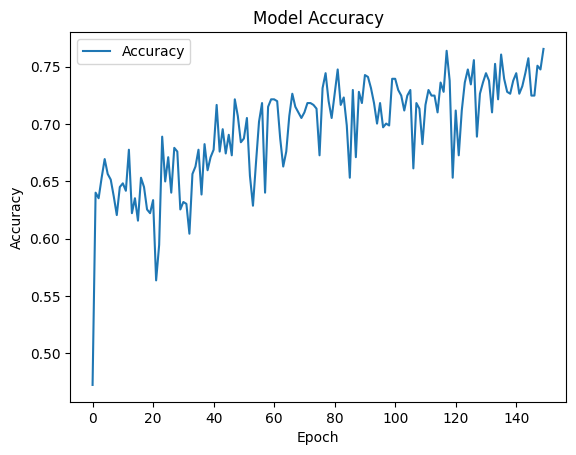

In [46]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

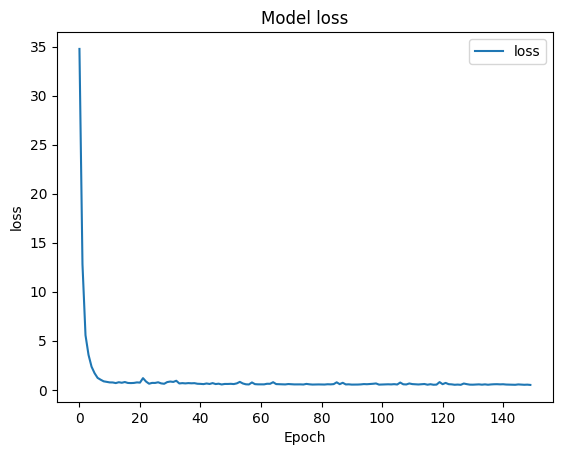

In [47]:
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.title('Model loss')
plt.show()

----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Abdelrahman \space Eid $$